In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

In [2]:
x = torch.tensor(([[0,0],[0,1],[1,0],[1,1]]),dtype=torch.float32)
y = torch.tensor(([[0,1,1,0]]), dtype=torch.float32 )

In [3]:
M=4
input_units = 2
output_units = 1
number_of_inputs=4

model1 = nn.Sequential(
    nn.Linear(input_units, M),
    nn.ReLU(),
    nn.Linear(M,output_units )
)

In [4]:
loss_funct = nn.MSELoss()
optimizer = torch.optim.SGD(model1.parameters(), lr=0.01)

0 0.5141059756278992
500 0.17136967182159424
1000 0.16654524207115173
1500 0.16257014870643616
2000 0.13913655281066895
2500 0.07460964471101761
3000 0.02647552639245987
3500 0.007183614186942577
4000 0.0016448432579636574
4500 0.0003443158639129251


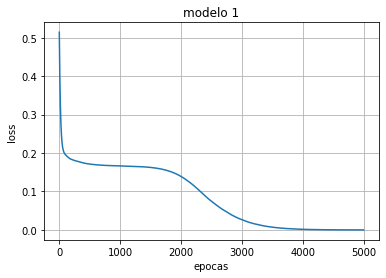

In [5]:
EPOCHS=5000
losses = []
acc=[]
for i in range(EPOCHS):
  y_pred = model1(x)
  acc.append((torch.sum(torch.round(y_pred)==y)/number_of_inputs).item())
  loss = loss_funct(y_pred, y.T)
  losses.append(loss.item())
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
  if i%(EPOCHS/10) == 0:
    print(i, loss.item())

plt.plot(range(0,EPOCHS), losses)
plt.title('modelo 1')
plt.grid()
plt.xlabel('epocas')
plt.ylabel('loss')
plt.show()

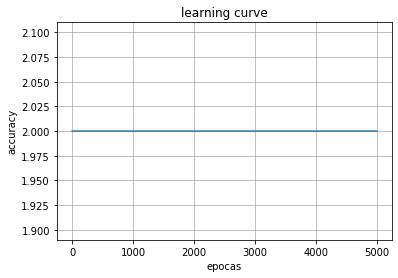

In [6]:
plt.plot(range(0,EPOCHS), acc)
plt.title('learning curve')
plt.grid()
plt.xlabel('epocas')
plt.ylabel('accuracy')
plt.show()

In [7]:
y_pred

tensor([[0.0076],
        [0.9864],
        [0.9966],
        [0.0049]], grad_fn=<AddmmBackward>)